In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [253]:
train_df = pd.read_csv('train.csv') 

In [254]:
train_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [255]:
train_df.shape

(466, 11)

This data set contains 466 records

In [256]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
Age                           466 non-null int64
Gender                        466 non-null object
Total_Bilirubin               466 non-null float64
Direct_Bilirubin              466 non-null float64
Alkaline_Phosphotase          466 non-null int64
Alamine_Aminotransferase      466 non-null int64
Aspartate_Aminotransferase    466 non-null int64
Total_Protiens                466 non-null float64
Albumin                       466 non-null float64
Albumin_and_Globulin_Ratio    463 non-null float64
Dataset                       466 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 40.1+ KB


 Only gender is non-numeric variable. All others are numeric.

In [257]:
train_df.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,45.321888,NaN,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,NaN,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,NaN,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,NaN,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000


We can see that there are missing values for Albumin_and_Globulin_Ratio as only 463 entries have valid values indicating 3 missing values.
Gender has only 2 values - Male/Female

In [258]:
#Which features are available in the dataset?
train_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [259]:
#Check for any null values
train_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 3 rows are null. Lets see whether this is an important feature

# Data Visualisation

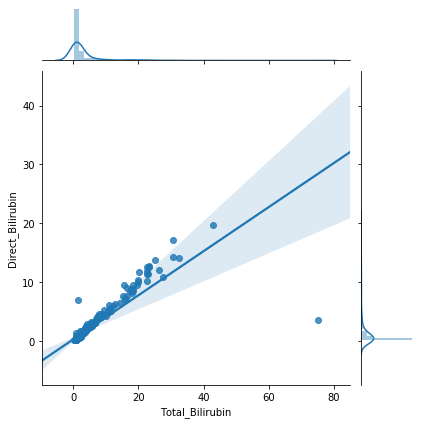

In [260]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=train_df, kind="reg")

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

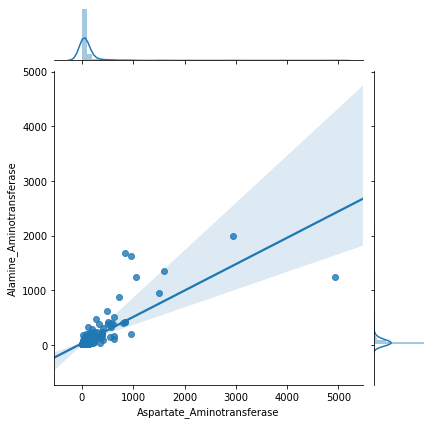

In [261]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=train_df, kind="reg")

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

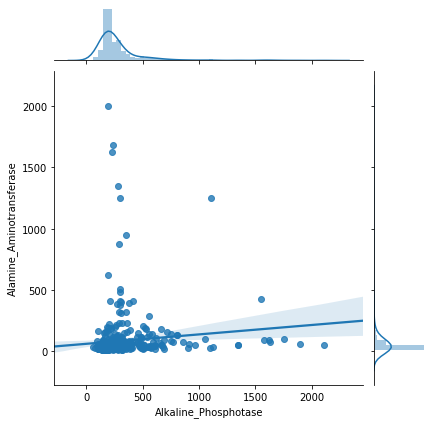

In [262]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=train_df, kind="reg")

No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

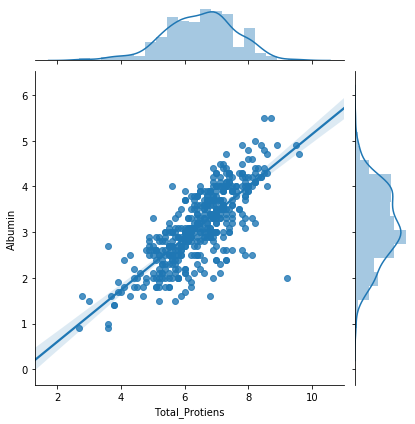

In [263]:
sns.jointplot("Total_Protiens", "Albumin", data=train_df, kind="reg")

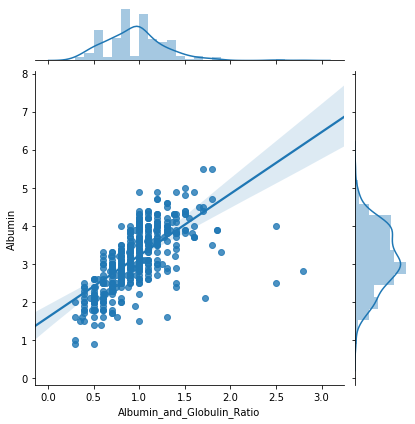

In [264]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=train_df, kind="reg")

# Observation

From the above jointplots and scatterplots, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin,
Aspartate_Aminotransferase & Alamine_Aminotransferase,
Total_Protiens & Albumin,
Albumin_and_Globulin_Ratio & Albumin

# Gender is a categorical data we need to convert it into numeric data

In [265]:
train_df = pd.concat([train_df,pd.get_dummies(train_df['Gender'], prefix = 'Gender')], axis=1)

In [266]:
train_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1,0,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1,1,0
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1,0,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1,0,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1,1,0


In [267]:
train_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000,466.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408,0.225322,0.774678
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094,0.418243,0.418243
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000,0.000000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [268]:
train_df[train_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
31,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
41,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1
188,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1


In [269]:
train_df["Albumin_and_Globulin_Ratio"] = train_df.Albumin_and_Globulin_Ratio.fillna(train_df['Albumin_and_Globulin_Ratio'].mean())

In [270]:
X = train_df.drop(['Gender','Dataset','Aspartate_Aminotransferase', 'Direct_Bilirubin'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,60,6.3,314,118,6.6,3.7,1.27,0,1
1,31,0.8,158,21,6.0,3.0,1.00,1,0
2,60,19.6,466,46,6.1,2.0,0.40,0,1


In [271]:
y = train_df['Dataset'] 

In [272]:
# Correlation
corr = X.corr()

In [273]:
corr

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.017007,0.112266,-0.066935,-0.202705,-0.281515,-0.220908,-0.029741,0.029741
Total_Bilirubin,0.017007,1.000000,0.153458,0.202096,0.006593,-0.211662,-0.188044,-0.108102,0.108102
Alkaline_Phosphotase,0.112266,0.153458,1.000000,0.100744,-0.023904,-0.165888,-0.239021,0.044595,-0.044595
Alamine_Aminotransferase,-0.066935,0.202096,0.100744,1.000000,-0.033468,-0.010968,0.015316,-0.090474,0.090474
Total_Protiens,-0.202705,0.006593,-0.023904,-0.033468,1.000000,0.773420,0.214273,0.140011,-0.140011
Albumin,-0.281515,-0.211662,-0.165888,-0.010968,0.773420,1.000000,0.669463,0.139308,-0.139308
Albumin_and_Globulin_Ratio,-0.220908,-0.188044,-0.239021,0.015316,0.214273,0.669463,1.000000,0.015511,-0.015511
Gender_Female,-0.029741,-0.108102,0.044595,-0.090474,0.140011,0.139308,0.015511,1.000000,-1.000000
Gender_Male,0.029741,0.108102,-0.044595,0.090474,-0.140011,-0.139308,-0.015511,-1.000000,1.000000


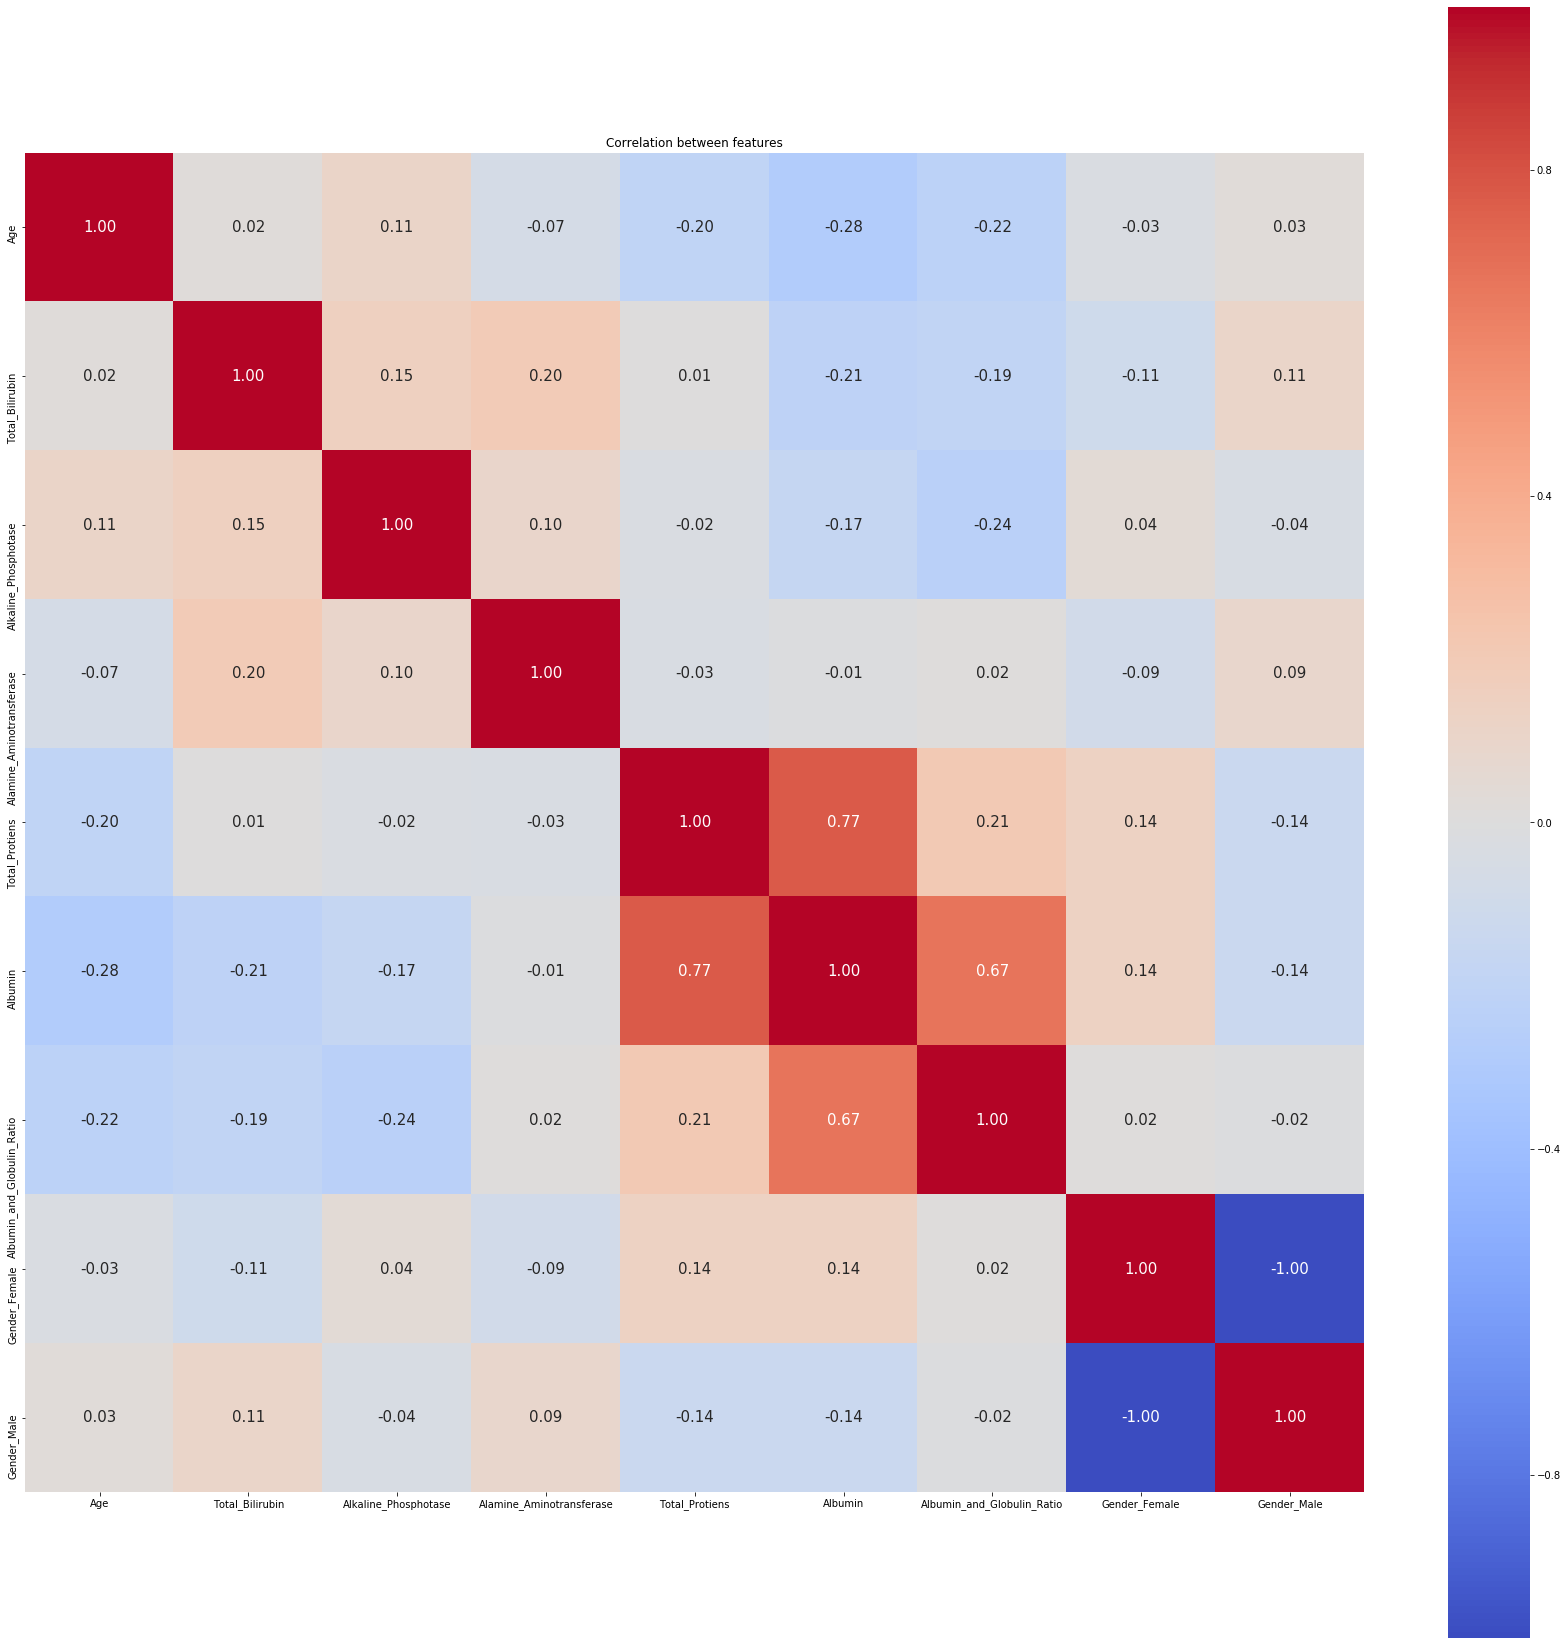

In [274]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [275]:
# The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

# Machine Learning

In [276]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [278]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Logistic Regression

In [279]:
logistic=LogisticRegression(solver='lbfgs',max_iter=1000)
logistic.fit(X_train,y_train)
logispredicted=logistic.predict(X_test)
print('Training Score:',logistic.score(X_train, y_train))
print('Testing Score:',logistic.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,logispredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,logispredicted))

Training Score: 0.7020057306590258
Testing Score: 0.7692307692307693
Accuracy: 0.7692307692307693
Confusion Matrix: 
 [[84  6]
 [21  6]]


# SVM

In [280]:
svmclf = SVC(gamma='scale')
svmclf.fit(X_train,y_train)
svmpredicted=logistic.predict(X_test)
print('Training Score:',svmclf.score(X_train, y_train))
print('Testing Score:',svmclf.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,svmpredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,svmpredicted))

Training Score: 0.7134670487106017
Testing Score: 0.7777777777777778
Accuracy: 0.7692307692307693
Confusion Matrix: 
 [[84  6]
 [21  6]]


# Random Forest

In [281]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)
#Predict Output
predicted = randomforest.predict(X_test)

print('Training Score:',randomforest.score(X_train, y_train))
print('Testing Score:',randomforest.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,predicted))

Training Score: 1.0
Testing Score: 0.6837606837606838
Accuracy: 0.6837606837606838
Confusion Matrix: 
 [[73 17]
 [20  7]]


# Decision Tree Classifier

In [282]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
#Predict Output
predicted = dt.predict(X_test)

print('Training Score:',dt.score(X_train, y_train))
print('Testing Score:',dt.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,predicted))

Training Score: 1.0
Testing Score: 0.6239316239316239
Accuracy: 0.6239316239316239
Confusion Matrix: 
 [[62 28]
 [16 11]]


# Gaussian Naive Bayes

In [283]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
gaussianpredicted=gaussian.predict(X_test)
print('Training Score:',gaussian.score(X_train, y_train))
print('Testing Score:',gaussian.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,gaussianpredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,gaussianpredicted))

Training Score: 0.5787965616045845
Testing Score: 0.5042735042735043
Accuracy: 0.5042735042735043
Confusion Matrix: 
 [[33 57]
 [ 1 26]]


In [284]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'Logistic Regression', 'SVM','Random Forest','Decision Tree'],
    'Training Score': [ gaussian.score(X_train, y_train),logistic.score(X_train, y_train), svmclf.score(X_train, y_train), randomforest.score(X_train, y_train),dt.score(X_train, y_train),],
    'Test Score': [ gaussian.score(X_test, y_test),logistic.score(X_test, y_test), svmclf.score(X_test, y_test), randomforest.score(X_test, y_test),dt.score(X_test, y_test),]
    })
models.sort_values(by='Test Score', ascending=False)

,Model,Training Score,Test Score
2,SVM,0.713467,0.777778
1,Logistic Regression,0.702006,0.769231
3,Random Forest,1.000000,0.683761
4,Decision Tree,1.000000,0.623932
0,Gaussian Naive Bayes,0.578797,0.504274


# SVM is giving the best test score

# Tuning the hyper-parameters using GridSearchCV

In [285]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel' : ['linear','rbf'],
          'C' : [1,2,3,4,5,6,7,8,9,10]}

grid_search = GridSearchCV(SVC(gamma = 'scale'), param_grid, cv=10, iid = True)

grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
print("Best accuracy of the model for the training set is:", best_accuracy)

best_params = grid_search.best_params_
print("Best parameters of the model for the training set is:", best_params)

Best accuracy of the model for the training set is: 0.6962750716332379
Best parameters of the model for the training set is: {'C': 1, 'kernel': 'linear'}


In [286]:
Classifier = LogisticRegression(solver='lbfgs',max_iter=1000)

In [287]:
# ss2 = StandardScaler()
# X = ss2.fit_transform(X)

In [288]:
Classifier.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Finding Cross Validation Score

In [289]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = Classifier, X = X, 
                             y = y, cv = 10, n_jobs = -1)

print("Showing all 10 of K-Fold Cross Validation accuracies:\n", accuracies)
accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)

Showing all 10 of K-Fold Cross Validation accuracies:
 [0.70833333 0.70833333 0.6875     0.69565217 0.7173913  0.67391304
 0.73913043 0.7826087  0.76086957 0.73913043]

Mean of accuracies:
 0.721286231884058

Standard Deviation:
 0.03218334194812281


In [290]:
test_df = pd.read_csv('test.csv')

In [291]:
test_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.1
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.5
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.4


In [292]:
test_df = pd.concat([test_df,pd.get_dummies(test_df['Gender'], prefix = 'Gender')], axis=1)

In [293]:
test_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
Gender_Female                 0
Gender_Male                   0
dtype: int64

In [294]:
test_df["Albumin_and_Globulin_Ratio"] = test_df.Albumin_and_Globulin_Ratio.fillna(test_df['Albumin_and_Globulin_Ratio'].mean())

In [295]:
X_test = test_df.drop(['Gender', 'Aspartate_Aminotransferase', 'Direct_Bilirubin'],axis = 1)

In [296]:
# X_test = ss2.transform(X_test)

In [297]:
answers = pd.DataFrame(Classifier.predict(X_test))
answers.to_csv('test_data_answers.csv', index=False,header=['Dataset'])

In [298]:
test_df['Dataset'] = answers
test_df.to_csv('test_data with answers.csv')

In [299]:
answers.loc[:,0].value_counts()

1    103
2     14
Name: 0, dtype: int64